<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/foreclosure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Libraries**

In [ ]:
!pip install fredapi

### **Import Libraries**

In [ ]:
import os
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **FRED API**

In [ ]:
fred = Fred(api_key=userdata.get('FRED'))

### **Data**

In [ ]:
# ---- dataset 1: manual annual data ----
data = {
    1926: 68100,
    1927: 91000,
    1928: 116000,
    1929: 134900,
    1930: 150000,
    1931: 193800,
    1932: 248700,
    1933: 252400
}
s_manual = pd.Series(data, name="Foreclosures")
s_manual.index = pd.to_datetime(s_manual.index, format="%Y")

# ---- dataset 2: FRED monthly, aggregated to annual ----
df = fred.get_series("M09075USM476NNBR").to_frame("Foreclosures")
df.index = pd.to_datetime(df.index)
df["Year"] = df.index.year
s_fred = df.groupby("Year")["Foreclosures"].sum()
s_fred.index = pd.to_datetime(s_fred.index, format="%Y")

# ---- concatenate ----
df = pd.concat([s_manual, s_fred]).sort_index()
df.head()

1926-01-01     68100.0
1927-01-01     91000.0
1928-01-01    116000.0
1929-01-01    134900.0
1930-01-01    150000.0
Name: Foreclosures, dtype: float64

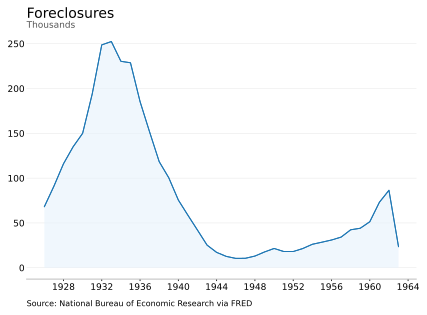

In [ ]:
x = df.index
y = df.values /1e3

# --- NYT-style colors ---
line_color = '#1f77b4'
fill_color = "#e6f1fb"
forecast_fill = "#dfeaf7"
grid_color = '#e6e6e6'

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")


# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)


# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.05, s='Foreclosures', transform=ax.transAxes, size=14)
ax.text(0, 1.01, "Thousands", transform=ax.transAxes,
        fontsize=9, color="#555555")


ax.annotate("Source: National Bureau of Economic Research via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

plt.ticklabel_format(style='plain', axis='y')  # <- disable sci notation on y-axis

fig.savefig("foreclosures.png", bbox_inches="tight", dpi=300)
plt.show()